## 1次元Poisson方程式に対する有限要素解の計算
### Poisson方程式の混合境界値問題
$$
 \begin{aligned}
 -u''(x) &= 2 \quad x \in (0,1), \\
 u(0)  &= 0, \\ 
 u'(1) &= -1.
 \end{aligned}
$$
厳密解は $u(x) = x(1-x)$である．

この問題に対して有限要素解を計算する．

In [23]:
# m: 区間分割数
function fem(m)
    b = -1;    h = 1/m;
    Aelem = h^(-1)*[1 -1; -1 1]    # 要素行列
    Felem = 2*h/2*[1,1]              # 要素行列
    A = zeros(m+1,m+1)
    F = zeros(m+1)
    gN = zeros(m+1) 
    gN[m+1] = b   # Neumann BC
   
    for k in 1:m
        A[k:k+1,k:k+1] += Aelem    # 足し込み
        F[k:k+1] += Felem
    end
    
    # Dirichlet BCの処理　　
    A[1,2] = 0.0
    F[1] = 0.0
    return A\(F+gN)
end

fem (generic function with 1 method)

err = [abs(uex((i - 1) * h) - u[i]) for i = 1:m + 1] = [0.0, 1.3877787807814457e-17, 1.3877787807814457e-17, 2.7755575615628914e-17, 2.7755575615628914e-17, 8.326672684688674e-17, 5.551115123125783e-17, 1.3877787807814457e-16, 1.942890293094024e-16, 2.220446049250313e-16, 2.7755575615628914e-16, 3.3306690738754696e-16, 3.608224830031759e-16, 3.885780586188048e-16, 3.885780586188048e-16, 3.3306690738754696e-16, 3.885780586188048e-16, 4.440892098500626e-16, 4.3021142204224816e-16, 4.85722573273506e-16, 4.329869796038126e-16]
maximum(err) = 4.85722573273506e-16


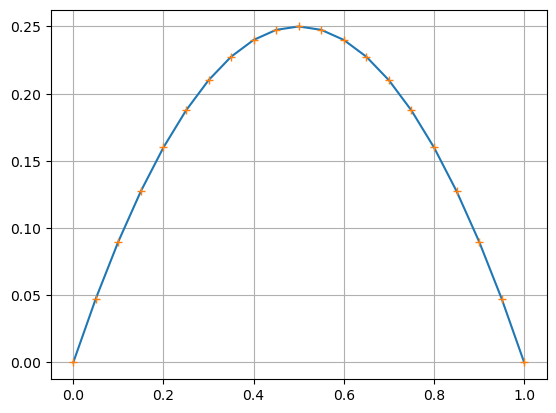

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x28ea0ccd0>

In [6]:
# 誤差の検証
m = 20 
h = 1/m;
u = fem(m)
uex(x) = x*(1-x)

@show err = [abs(uex((i-1)*h) - u[i]) for i in 1:m+1];  
@show maximum(err)    # 誤差の絶対値最大の値

- 1次元Poisson方程式に対して，有限要素解は各節点で厳密解と一致するという特別な性質がある．
一般には成立しないことに注意．実際に2次元以上では成立しない．
- したがって，丸め誤差などの計算機誤差がなければ，最大値誤差は $0$ に一致するはずである．
- 実際の出力された最大値誤差の値は `1e-16`のオーダーで，[machine epsilon](https://docs.julialang.org/en/v1/manual/integers-and-floating-point-numbers/#Machine-epsilon)に近いため，
$0$と見なしても問題ないだろう．

- Juliaにおいてmachine epsilonは `eps`で表示できる．

In [17]:
eps(Float64)

2.220446049250313e-16